In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values
print(X,y)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

In [5]:
fil = open("irisData.txt",'w+')
df.to_csv(fil)
fil.close()
print("done")

done


In [1]:
# each pattern has values for inputs and corresponding desired output
patterns = np.array([(0,0,1),(0,1,1),(1,0,-1),(1,1,1)]) 
m = patterns.shape[0] # number of patterns
ni = patterns.shape[1] -1 # ni is number of inputs assuming one output node
X=patterns[:,:ni].T # input matrix with each column representing an input vector
desiredOutputs =patterns[:,ni] # one desired output for each input vector
currentWeights = np.zeros(ni)  # weight vector initialized to zeros

In [2]:
def logistic(sp) :
    return 1.0/(1 + np.exp(-sp))

In [3]:
def bipolarLogistic(sp) :
    return ((np.exp(sp)-np.exp(-sp)))/((np.exp(sp) + np.exp(-sp)))
print(bipolarLogistic(-5),bipolarLogistic(0),bipolarLogistic(+1),bipolarLogistic(5))


-0.999909204262595 0.0 0.7615941559557649 0.999909204262595


In [4]:
def randomize(num) : 
    """  Generates num random numbers 
        returns a numpy array of random numbers
    """
    import random
    randomList = []
    for i in range(num) :
        randomList.append(random.uniform(-1,1))
    return np.array(randomList)
print(randomize(5))

[-0.31409724 -0.74649234  0.53572362  0.16147102 -0.99014659]


In [5]:
def tabulate (vec,bias) :
    print("weights ",vec," bias ",bias)
    computedOutputs = feedForward(vec,bias)
    for i in range(4) :
        desired = desiredOutputs[i]
        computed = computedOutputs[i]
        print("pattern"+str(i+1),patterns[i][0],patterns[i][1],desired,round(computed,6))


In [6]:
def feedForward (weights,bias):
    net = np.dot(weights.T,X)+bias
    #print("weights ",weights,bias,"nets ",net)
    outputs = bipolarLogistic(net)
    return outputs
wts=randomize(2)
bia=randomize(1)
tabulate(wts,bia)
outs = feedForward(wts,bia)
print(wts,bia,outs)

weights  [-0.03653367 -0.53894928]  bias  [0.70706162]
pattern1 0 0 1 0.608831
pattern2 0 1 1 0.166546
pattern3 1 0 -1 0.585327
pattern4 1 1 1 0.130825
[-0.03653367 -0.53894928] [0.70706162] [0.60883094 0.16654632 0.58532706 0.13082455]


In [28]:
learningRate=0.1
def trainDelta(weights,bias,pn) :
    currentInputs=X[:,pn]
    net = np.dot(weights.T,currentInputs) + bias
    output = bipolarLogistic(net)
    desired = desiredOutputs[pn]
    difference = desired - output
    #print(output,desired,difference)
    gradient = 1-output * output
    correction = learningRate * gradient * difference 
    deltaW = currentInputs * correction
    newWeights = weights + deltaW
    newBias = np.copy(bias + correction)
    #print(weights,bias," changed to ",newWeights,newBias)
    return newWeights,newBias,difference
    
wts=randomize(2)
bia = randomize(1)[0]
tabulate(wts,bia)
nwts,nb,diff=trainDelta(wts,bia,3)
tabulate(nwts,nb)
nwts,nb,dif=trainDelta(nwts,nb,2)
tabulate(nwts,nb)

weights  [-0.60415347  0.80169116]  bias  -0.6092016110400231
pattern1 0 0 1 -0.543565
pattern2 0 1 1 0.190147
pattern3 1 0 -1 -0.837683
pattern4 1 1 1 -0.389885
weights  [-0.48629264  0.91955198]  bias  -0.49134078662537833
pattern1 0 0 1 -0.45528
pattern2 0 1 1 0.403825
pattern3 1 0 -1 -0.75204
pattern4 1 1 1 -0.058016
weights  [-0.49706494  0.91955198]  bias  -0.502113089276973
pattern1 0 0 1 -0.463777
pattern2 0 1 1 0.394771
pattern3 1 0 -1 -0.761249
pattern4 1 1 1 -0.079458


In [36]:
def trainEpoch (weights, bias) :
    wts = np.copy(weights)
    bia =np.copy(bias)
    for j in range(m) :
        print(" Training with pattern ",j+1," weights ",weights,bias, end ="   ")
        newWeights,newBias,diff = trainDelta(wts,bia,j)
        tabulate(newWeights,newBias)
        wts = np.copy(newWeights)
        bia = np.copy(newBias)
        print(" modified Weights ",newWeights,newBias,)
    error = np.sum((desiredOutputs - feedForward(wts,bia))**2 )  
    return wts,bia,error

wts=randomize(2)
bia = randomize(1)[0]
tabulate(wts,bia)
nwts,nb, cost= trainEpoch(wts,bia)
print(nwts,nb,cost)



weights  [0.19557118 0.40041917]  bias  0.18435533664558257
pattern1 0 0 1 0.182295
pattern2 0 1 1 0.526127
pattern3 1 0 -1 0.362644
pattern4 1 1 1 0.652905
 Training with pattern  1  weights  [0.19557118 0.40041917] 0.18435533664558257   weights  [0.19557118 0.40041917]  bias  0.26340850954781936
pattern1 0 0 1 0.257481
pattern2 0 1 1 0.580905
pattern3 1 0 -1 0.429252
pattern4 1 1 1 0.695948
 modified Weights  [0.19557118 0.40041917] 0.26340850954781936
 Training with pattern  2  weights  [0.19557118 0.40041917] 0.18435533664558257   weights  [0.19557118 0.42818627]  bias  0.2911756140051111
pattern1 0 0 1 0.283216
pattern2 0 1 1 0.616514
pattern3 1 0 -1 0.451631
pattern4 1 1 1 0.723492
 modified Weights  [0.19557118 0.42818627] 0.2911756140051111
 Training with pattern  3  weights  [0.19557118 0.40041917] 0.18435533664558257   weights  [0.08001705 0.42818627]  bias  0.1756214916569712
pattern1 0 0 1 0.173838
pattern2 0 1 1 0.539754
pattern3 1 0 -1 0.250212
pattern4 1 1 1 0.594
 modif

In [39]:
wts=randomize(2)
bia = randomize(1)[0]
tabulate(wts,bia)
costs=[]
epochs = 500
for t in range(epochs) :
    nwts,nb, cost= trainEpoch(wts,bia)
    print("+++++++++++Epoch ",t+1," cost= ",cost)
    wts=np.copy(nwts)
    bia = nb
    if(t%10 == 0) :
        print(" *********Epoch ",t,"Error " ,cost)
        costs.append(cost)
        if cost < .03 :
            print("Weights converged in ",t," epochs with error ",error)
            break
print(costs) 

weights  [0.18797151 0.99800185]  bias  0.6854966625092835
pattern1 0 0 1 0.595081
pattern2 0 1 1 0.933314
pattern3 1 0 -1 0.703132
pattern4 1 1 1 0.953727
 Training with pattern  1  weights  [0.18797151 0.99800185] 0.6854966625092835   weights  [0.18797151 0.99800185]  bias  0.7116494934082261
pattern1 0 0 1 0.61171
pattern2 0 1 1 0.936605
pattern3 1 0 -1 0.716113
pattern4 1 1 1 0.956033
 modified Weights  [0.18797151 0.99800185] 0.7116494934082261
 Training with pattern  2  weights  [0.18797151 0.99800185] 0.6854966625092835   weights  [0.18797151 0.99878016]  bias  0.7124278066257534
pattern1 0 0 1 0.612197
pattern2 0 1 1 0.936796
pattern3 1 0 -1 0.716492
pattern4 1 1 1 0.956167
 modified Weights  [0.18797151 0.99878016] 0.7124278066257534
 Training with pattern  3  weights  [0.18797151 0.99800185] 0.6854966625092835   weights  [0.10444033 0.99878016]  bias  0.6288966238994868
pattern1 0 0 1 0.557292
pattern2 0 1 1 0.92573
pattern3 1 0 -1 0.625103
pattern4 1 1 1 0.939306
 modified W

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

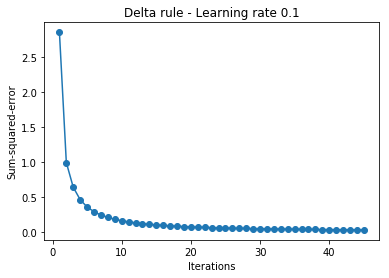

In [41]:
plt.plot(range(1, len(costs)+1), costs, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Delta rule - Learning rate 0.1')
plt.show()

In [44]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values
print(X,y)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

In [14]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 433kB/s ta 0:00:01


In [16]:
import numpy as np

class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

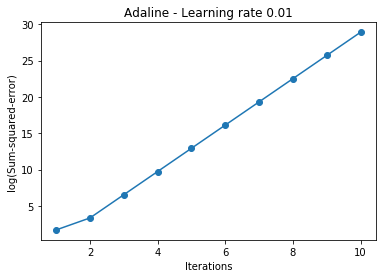

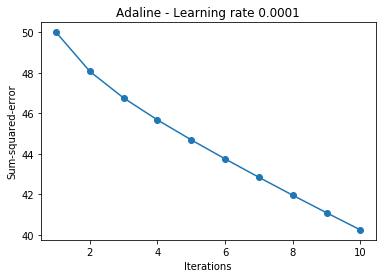

In [17]:
ada = AdalineGD(epochs=10, eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

ada = AdalineGD(epochs=10, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()